In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [6]:
stock_data = pd.read_csv('../data/external/AMZN.csv')

stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')
stock_data = stock_data.set_index(['Date'])
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-23,100.430000,101.059998,97.620003,98.709999,98.709999,57559300
2023-03-24,98.070000,98.300003,96.400002,98.129997,98.129997,56095400
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300


In [7]:
df_close = stock_data['Close']
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

In [10]:
forecast_steps = len(test_data)
ses_model = SimpleExpSmoothing(train_data)
ses_model_fitted = ses_model.fit()
ses_predictions = ses_model_fitted.predict(start=1, end=forecast_steps)

C:\Users\KUDIPUDI\.conda\envs\dsEnv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
ses_predictions

Date
2023-03-29    4.577182
2023-03-30    4.606111
2023-03-31    4.624010
2023-04-03    4.636850
2023-04-04    4.629386
2023-04-05    4.643169
2023-04-06    4.617491
2023-04-10    4.625149
2023-04-11    4.626562
2023-04-12    4.605503
2023-04-13    4.584368
2023-04-14    4.626614
2023-04-17    4.629790
2023-04-18    4.632078
2023-04-19    4.628122
2023-04-20    4.646294
2023-04-21    4.642753
2023-04-24    4.670939
2023-04-25    4.665700
2023-04-26    4.632340
2023-04-27    4.652676
2023-04-28    4.696486
2023-05-01    4.660189
2023-05-02    4.627236
2023-05-03    4.640133
2023-05-04    4.640975
dtype: float64

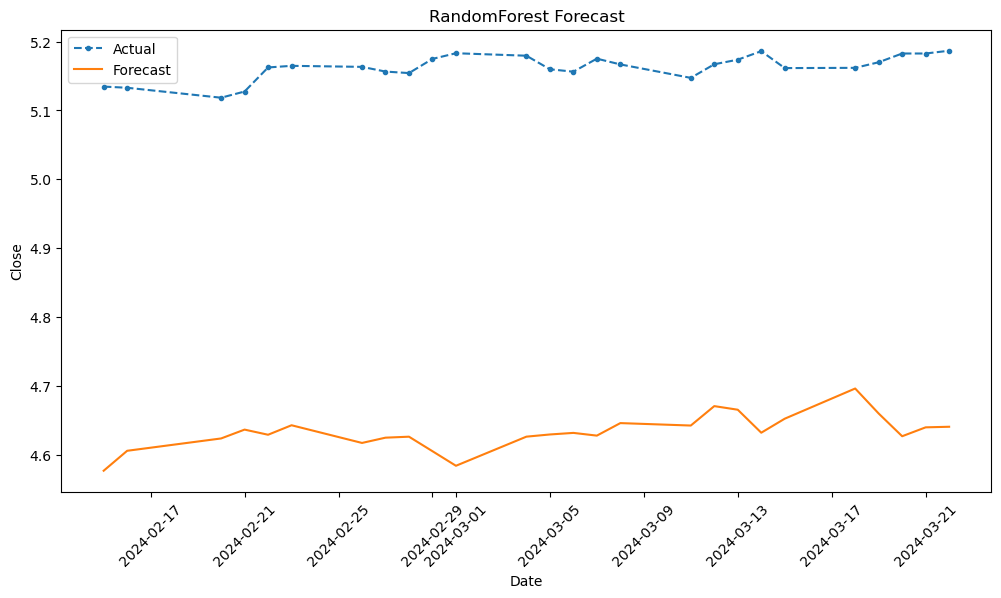

In [16]:
# Actual vs Fitted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Actual", marker='.', linestyle='--')
plt.plot(test_data.index, ses_predictions, label="Forecast")
plt.title("RandomForest Forecast")
plt.xlabel("Date")
plt.ylabel("Close")
plt.xticks(rotation=45)
plt.legend()

plt.show()